## ABSTRACT:

#####  A key challenge for property sellers is to determine the sale price of the property. The ability to predict the exact property value is beneficial for property investors as well as for buyers to plan their finances according to the price trend. The property prices depend on the number of features like the property area, basement square footage, year built, number of bedrooms, and so on.

## PROBLEM STATEMENT:

### Predicting house price using Linear Regression with OLS Method

### Import necessary library

In [2]:

import numpy as np   
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split # Sklearn package's randomized data splitting function
from sklearn.linear_model import LinearRegression
import pandas as pd    

In [3]:
#load and review dataset
df=pd.read_csv("HousePrices.csv")

In [4]:
df.head()
#print first five rows

,Id,Dwell_Type,Zone_Class,LotFrontage,LotArea,Road_Type,Alley,Property_Shape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Property_Sale_Price
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df.dtypes
#datatypes of the variables

Id                       int64
Dwell_Type               int64
Zone_Class              object
LotFrontage            float64
LotArea                  int64
                        ...   
MoSold                   int64
YrSold                   int64
SaleType                object
SaleCondition           object
Property_Sale_Price      int64
Length: 81, dtype: object

In [6]:
x = df.columns.to_series().groupby(df.dtypes).groups
x
#for viewing all the columns

{int64: ['Id', 'Dwell_Type', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'Property_Sale_Price'], float64: ['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], object: ['Zone_Class', 'Road_Type', 'Alley', 'Property_Shape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'Dwelling_Type', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functiona

In [7]:
df.shape
#get the shape

(2073, 81)

In [8]:
df.info()
#get the info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2073 entries, 0 to 2072
Data columns (total 81 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   2073 non-null   int64  
 1   Dwell_Type           2073 non-null   int64  
 2   Zone_Class           2073 non-null   object 
 3   LotFrontage          1753 non-null   float64
 4   LotArea              2073 non-null   int64  
 5   Road_Type            2073 non-null   object 
 6   Alley                129 non-null    object 
 7   Property_Shape       2073 non-null   object 
 8   LandContour          2073 non-null   object 
 9   Utilities            2073 non-null   object 
 10  LotConfig            2073 non-null   object 
 11  LandSlope            2073 non-null   object 
 12  Neighborhood         2073 non-null   object 
 13  Condition1           2073 non-null   object 
 14  Condition2           2073 non-null   object 
 15  Dwelling_Type        2073 non-null   o

In [9]:
df.isnull().sum()
#missing values

Id                       0
Dwell_Type               0
Zone_Class               0
LotFrontage            320
LotArea                  0
                      ... 
MoSold                   0
YrSold                   0
SaleType                 0
SaleCondition            0
Property_Sale_Price      0
Length: 81, dtype: int64

### Finding the missing values

In [10]:
y = df.columns.to_series().groupby(df.isnull().sum()).groups
y


{0: ['Id', 'Dwell_Type', 'Zone_Class', 'LotArea', 'Road_Type', 'Property_Shape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'Dwelling_Type', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageCars', 'GarageArea', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition', 'Property_Sale_Price'], 1: ['Electrical'], 14: ['MasVnrType', 'MasVnrArea'], 59: ['BsmtQual', 'BsmtCond', 'BsmtFinType1'], 60: ['BsmtFinType2'], 61: ['Bsm

In [11]:
df.drop(['Alley','MiscFeature','Fence','FireplaceQu','PoolQC'], axis = 1,inplace=True)
#dropping these columns because it has alot of missing value 

In [12]:
df.shape

(2073, 76)

In [13]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2073 entries, 0 to 2072
Data columns (total 76 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   2073 non-null   int64  
 1   Dwell_Type           2073 non-null   int64  
 2   Zone_Class           2073 non-null   object 
 3   LotFrontage          1753 non-null   float64
 4   LotArea              2073 non-null   int64  
 5   Road_Type            2073 non-null   object 
 6   Property_Shape       2073 non-null   object 
 7   LandContour          2073 non-null   object 
 8   Utilities            2073 non-null   object 
 9   LotConfig            2073 non-null   object 
 10  LandSlope            2073 non-null   object 
 11  Neighborhood         2073 non-null   object 
 12  Condition1           2073 non-null   object 
 13  Condition2           2073 non-null   object 
 14  Dwelling_Type        2073 non-null   object 
 15  HouseStyle           2073 non-null   o

In [14]:
cols = ['LotFrontage','GarageYrBlt','MasVnrArea']
df[cols]=df[cols].fillna(0)
#filling missing values in float columns

In [15]:
colmn=['GarageQual','GarageCond','GarageFinish','GarageType','Electrical','BsmtFinType1','BsmtExposure','BsmtQual','BsmtCond','MasVnrType','BsmtFinType2']
df[colmn] = df[colmn].apply(lambda x: x.fillna(x.value_counts().index[0]))
#filling missing values in categorical columns

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2073 entries, 0 to 2072
Data columns (total 76 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   2073 non-null   int64  
 1   Dwell_Type           2073 non-null   int64  
 2   Zone_Class           2073 non-null   object 
 3   LotFrontage          2073 non-null   float64
 4   LotArea              2073 non-null   int64  
 5   Road_Type            2073 non-null   object 
 6   Property_Shape       2073 non-null   object 
 7   LandContour          2073 non-null   object 
 8   Utilities            2073 non-null   object 
 9   LotConfig            2073 non-null   object 
 10  LandSlope            2073 non-null   object 
 11  Neighborhood         2073 non-null   object 
 12  Condition1           2073 non-null   object 
 13  Condition2           2073 non-null   object 
 14  Dwelling_Type        2073 non-null   object 
 15  HouseStyle           2073 non-null   o

In [17]:
y = df.columns.to_series().groupby(df.isnull().sum()).groups
y
#checking for missing values once again and inferening that no missing values in any column

{0: ['Id', 'Dwell_Type', 'Zone_Class', 'LotFrontage', 'LotArea', 'Road_Type', 'Property_Shape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'Dwelling_Type', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', '

In [18]:

from sklearn import preprocessing

In [19]:
label_encoder = preprocessing.LabelEncoder()
#converting categorical columns into numerical columns

In [20]:
label_df=['Zone_Class', 'SaleType', 'SaleCondition', 'Road_Type', 'Property_Shape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'Dwelling_Type', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive','CentralAir']

In [21]:
df[label_df]=df[label_df].apply(label_encoder.fit_transform)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2073 entries, 0 to 2072
Data columns (total 76 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   2073 non-null   int64  
 1   Dwell_Type           2073 non-null   int64  
 2   Zone_Class           2073 non-null   int32  
 3   LotFrontage          2073 non-null   float64
 4   LotArea              2073 non-null   int64  
 5   Road_Type            2073 non-null   int32  
 6   Property_Shape       2073 non-null   int32  
 7   LandContour          2073 non-null   int32  
 8   Utilities            2073 non-null   int32  
 9   LotConfig            2073 non-null   int32  
 10  LandSlope            2073 non-null   int32  
 11  Neighborhood         2073 non-null   int32  
 12  Condition1           2073 non-null   int32  
 13  Condition2           2073 non-null   int32  
 14  Dwelling_Type        2073 non-null   int32  
 15  HouseStyle           2073 non-null   i

In [23]:
df.shape

(2073, 76)

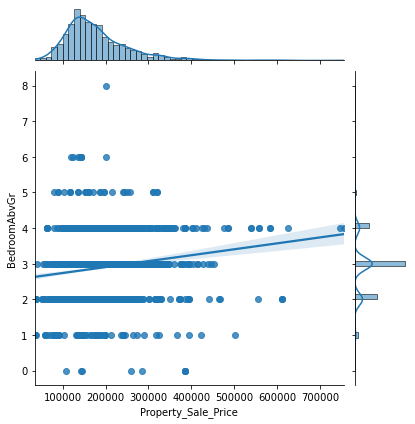

In [24]:
sns.jointplot(x="Property_Sale_Price", y="BedroomAbvGr", data=df, kind="reg");

### Training and testing the model

In [25]:
X=df.drop("Property_Sale_Price",axis=1)
y=df["Property_Sale_Price"]

In [26]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.25, random_state=0)

In [27]:
from sklearn.linear_model import LinearRegression 
model= LinearRegression()  
model.fit(X_train, y_train)

LinearRegression()

In [28]:
model.score(X_train, y_train)

0.8387143089365453

In [29]:
model.score(X_test, y_test)

0.8767226806115854

In [30]:
import statsmodels.api as sm

D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [31]:
X = sm.add_constant(X)

D:\Anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


In [32]:
model = sm.OLS(y, X).fit()
#Ordinary least squares (OLS) regression is a statistical method of analysis that estimates the relationship between one or more independent variables and a dependent variable;

In [33]:
summary = model.summary()
print(summary)

                             OLS Regression Results                            
Dep. Variable:     Property_Sale_Price   R-squared:                       0.850
Model:                             OLS   Adj. R-squared:                  0.845
Method:                  Least Squares   F-statistic:                     155.2
Date:                 Sat, 19 Mar 2022   Prob (F-statistic):               0.00
Time:                         22:03:03   Log-Likelihood:                -24344.
No. Observations:                 2073   AIC:                         4.884e+04
Df Residuals:                     1999   BIC:                         4.925e+04
Df Model:                           73                                         
Covariance Type:             nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1.212e+06   1.09e+

In [34]:
ols = LinearRegression()
ols.fit(X_train, y_train)
y_ols_pred_normal = ols.predict(X_test)
r_ols_normal = ols.score(X_train,y_train)
print("R-squared = ", r_ols_normal)
#The value of R-squared is closer to 1.

R-squared =  0.8387143089365453


#### Inference

In [ ]:
#Here, the training-set accuracy score is0.83871 while the test-set accuracy to be 0.87672. The model is generalised model  as in training data the model performs well on the training data and also performs well on the evaluation data.And the value of R-qduared is consider to be closer to 1.